In [81]:
import warnings
warnings.filterwarnings ('ignore')

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

In [83]:
df=pd.read_csv("titanic_dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [86]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

null values present in age, cabin, and embarked

In [87]:
#MISSING VALUES PRESENT IN AGE FILLED BY MEDIAN
df['Age']=df['Age'].fillna(df['Age'].median())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [89]:
df.drop('Cabin',axis=1,inplace=True)

In [90]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:xlabel='Age'>

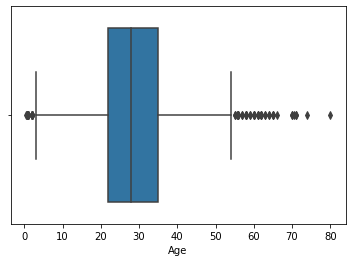

In [91]:
sns.boxplot(df['Age'])

In [92]:
Q1=np.percentile(df['Age'],25,interpolation='midpoint')
Q2=np.percentile(df['Age'],50,interpolation='midpoint')
Q3=np.percentile(df['Age'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['Age']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  22.0
Q2 =  28.0
Q3 =  35.0

Lower limit =  2.5
Upper limit =  54.5
outlier [2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [93]:
ind1 = df[(df["Age"] < low_limit) | (df["Age"] > up_limit)].index
df.loc[ind1].index

Int64Index([  7,  11,  15,  16,  33,  54,  78,  94,  96, 116, 119, 152, 164,
            170, 172, 174, 183, 195, 205, 232, 252, 268, 275, 280, 297, 305,
            326, 340, 366, 381, 386, 438, 456, 467, 469, 479, 483, 487, 492,
            493, 530, 545, 555, 570, 587, 625, 626, 630, 642, 644, 647, 659,
            672, 684, 694, 745, 755, 772, 788, 803, 824, 827, 829, 831, 851,
            879],
           dtype='int64')

In [94]:
df.drop(ind1,inplace=True)

<AxesSubplot:xlabel='SibSp'>

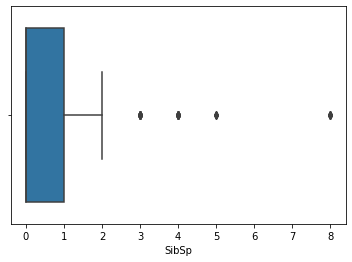

In [95]:
sns.boxplot(df["SibSp"])

In [96]:
Q1=np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(df['SibSp'],75,interpolation='midpoint')
print('Q1 = ',Q1)
print('Q2 = ',Q2)
print('Q3 = ',Q3)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR
print("\nLower limit = ",low_limit)
print("Upper limit = ",up_limit)
outlier=[]
for x in df['SibSp']:
    if((x>up_limit) | (x<low_limit)):
        outlier.append(x)
print("outlier",outlier)

Q1 =  0.0
Q2 =  0.0
Q3 =  1.0

Lower limit =  -1.5
Upper limit =  2.5
outlier [3, 3, 4, 5, 3, 4, 5, 3, 3, 8, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 3, 5, 3, 4, 4, 3, 5, 4, 3, 4, 8, 4, 3, 8, 4, 8]


In [97]:
ind2 = df[(df["SibSp"] < low_limit) | (df["SibSp"] > up_limit)].index
df.loc[ind2].index

Int64Index([ 24,  27,  50,  59,  63,  68,  71,  85,  88, 159, 171, 176, 180,
            182, 201, 229, 233, 261, 266, 278, 324, 341, 374, 409, 480, 485,
            541, 542, 634, 683, 686, 726, 787, 792, 813, 819, 846, 850, 863],
           dtype='int64')

In [98]:
df.drop(ind2,inplace=True)

<AxesSubplot:xlabel='SibSp'>

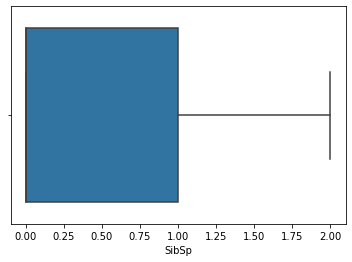

In [99]:
sns.boxplot(df["SibSp"])

In [100]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [101]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [102]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [103]:
x=df.drop(["Survived","Name","Ticket"],axis=1)

In [104]:
y=df["Survived"]

In [105]:
#SPLITTING DATA 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [106]:
#MINMAX SCALING
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
x_train=mm.fit_transform(x_train)
x_test=mm.fit_transform(x_test)

# LOGISTIC REGRESSION

In [107]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)
y_predlm=logmodel.predict(x_test)

In [108]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print("Accuracy is ",accuracy_score(y_test,y_predlm))
print("f1 score is ",f1_score(y_test,y_predlm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_predlm))

Accuracy is  0.8071065989847716
f1 score is  0.7908003577017662
Confusion Matrix 
 [[107  14]
 [ 24  52]]


# Decesion Tree Algorithm

In [137]:
 from sklearn.tree import DecisionTreeClassifier
dtcl=DecisionTreeClassifier()
dtcl.fit(x_train,y_train)
y_preddt=dtcl.predict(x_test)

In [138]:
print("Accuracy is ",accuracy_score(y_test,y_preddt))
print("f1 score is ",f1_score(y_test,y_preddt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_preddt))

Accuracy is  0.766497461928934
f1 score is  0.7536428882122661
Confusion Matrix 
 [[98 23]
 [23 53]]


# Random Forest Model

In [110]:
from sklearn.ensemble import RandomForestClassifier
r_forest=RandomForestClassifier()
r_forest.fit(x_train,y_train)
y_pred_rt=r_forest.predict(x_test)

In [111]:
print("Accuracy is ",accuracy_score(y_test,y_pred_rt))
print("f1 score is ",f1_score(y_test,y_pred_rt,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_rt))

Accuracy is  0.8375634517766497
f1 score is  0.8248888888888888
Confusion Matrix 
 [[109  12]
 [ 20  56]]


# KNN Model


In [112]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)
acc_values

[0.7918781725888325,
 0.8020304568527918,
 0.8223350253807107,
 0.8020304568527918,
 0.8121827411167513,
 0.8071065989847716,
 0.8020304568527918,
 0.8121827411167513,
 0.8071065989847716,
 0.8071065989847716,
 0.8020304568527918,
 0.8071065989847716]

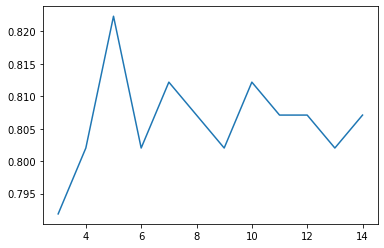

In [113]:
plt.plot(neighbours,acc_values)

In [114]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [126]:
print("Accuracy is ",accuracy_score(y_test,y_pred))
print("f1 score is ",f1_score(y_test,y_pred,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))

Accuracy is  0.8223350253807107
f1 score is  0.8079012620845291
Confusion Matrix 
 [[108  13]
 [ 22  54]]


# SVM Model


In [127]:
#linear
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred_svm=svm_linear.predict(x_test)

In [128]:
print("Accuracy is ",accuracy_score(y_test,y_pred_svm))
print("f1 score is ",f1_score(y_test,y_pred_svm,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_svm))

Accuracy is  0.7969543147208121
f1 score is  0.7811111111111111
Confusion Matrix 
 [[105  16]
 [ 24  52]]


In [129]:
#polynomial
from sklearn.svm import SVC
svm_poly=SVC(kernel='poly')
svm_poly.fit(x_train,y_train)
y_pred_poly=svm_linear.predict(x_test)

In [130]:
print("Accuracy is ",accuracy_score(y_test,y_pred_poly))
print("f1 score is ",f1_score(y_test,y_pred_poly,average='macro'))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred_poly))

Accuracy is  0.7969543147208121
f1 score is  0.7811111111111111
Confusion Matrix 
 [[105  16]
 [ 24  52]]


# Naive Bayes Classifier 

In [131]:
from sklearn.naive_bayes import GaussianNB
cla=GaussianNB()
cla.fit(x_train,y_train)

GaussianNB()

In [132]:
y_predgau=cla.predict(x_test)

In [133]:
print("CONFUSION MATRIX =\n",confusion_matrix(y_test,y_predgau))
print("ACCURACY SCORE =",accuracy_score(y_test,y_predgau))

CONFUSION MATRIX =
 [[101  20]
 [ 22  54]]
ACCURACY SCORE = 0.7868020304568528


In [134]:
from sklearn.naive_bayes import BernoulliNB
cl=BernoulliNB()
cl.fit(x_train,y_train)

BernoulliNB()

In [135]:
y_predber=cl.predict(x_test)

In [136]:
print("CONFUSION MATRIX =\n",confusion_matrix(y_test,y_predber))
print("ACCURACY SCORE =",accuracy_score(y_test,y_predber))

CONFUSION MATRIX =
 [[101  20]
 [ 19  57]]
ACCURACY SCORE = 0.8020304568527918


logistic regression Accuracy is  0.8071065989847716

desicion tree Accuracy is  0.7563451776649747

random forest model Accuracy is  0.8375634517766497

KNN Accuracy is  0.8223350253807107

SVM linerar Accuracy is  0.7969543147208121

SVM polynomial Accuracy is  0.7969543147208121

naive bayes gaussian Accuracy score  0.7868020304568528

naive bayes bernouli accuracy score 0.8020304568527918

The best model is random forest model